In [148]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.display.float_format = '{:,.3f}'.format
df = pd.read_excel("/Users/kaushik/Desktop/MS CS/Fall 2017/ML/HW1/DataSet/university data.xlsx")
df = df[['name','CS Score (USNews)','Research Overhead %','Admin Base Pay$','Tuition(out-state)$']]

In [222]:
cs_score = df['CS Score (USNews)']
mu1 = cs_score.mean()
var1 = cs_score.var()
sigma1 = cs_score.std()

In [223]:
research_overhead = df['Research Overhead %']
mu2 = research_overhead.mean()
var2 = research_overhead.var()
sigma2 = research_overhead.std()

In [224]:
admin_base_pay = df['Admin Base Pay$']
mu3 = admin_base_pay.mean()
var3 = admin_base_pay.var()
sigma3 = admin_base_pay.std()

In [225]:
tuition = df['Tuition(out-state)$']
mu4 = tuition.mean()
var4 = tuition.var()
sigma4 = tuition.std()

In [170]:
np.set_printoptions(formatter={float: '{: 0.3f}'.format})
np.set_printoptions(suppress=True)
covarianceMat = df.cov().as_matrix();
print(covarianceMat.tolist())

[[0.4574999999999998, 1.1056249999999999, 3879.781845238092, 1058.4797619047615], [1.1056249999999999, 12.850416666666668, 70279.37648809525, 2805.7889880952375], [3879.781845238092, 70279.37648809525, 14189720820.903067, -163685641.25765312], [1058.4797619047615, 2805.7889880952375, -163685641.25765312, 31367695.78996599]]


In [166]:
correlationMat = df.corr().as_matrix()
print(correlationMat)

[[ 1.     0.456  0.048  0.279]
 [ 0.456  1.     0.165  0.14 ]
 [ 0.048  0.165  1.    -0.245]
 [ 0.279  0.14  -0.245  1.   ]]


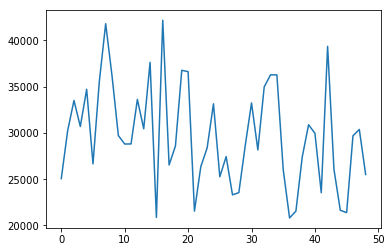

In [10]:
from matplotlib import pyplot
pyplot.plot(range(0,tuition.count()+1),tuition.tolist());
pyplot.show()

In [242]:
from scipy.stats import norm
cs_score_as_list = cs_score.tolist()[:cs_score.count()];
cs_score_logpdf = sum(norm.logpdf(cs_score_as_list,mu1,std1));

research_overhead_as_list = research_overhead.tolist()[:research_overhead.count()];
research_overhead_logpdf = sum(norm.logpdf(research_overhead_as_list,mu2,std2));

admin_base_pay_as_list = admin_base_pay.tolist()[:admin_base_pay.count()];
admin_base_pay_logpdf = sum(norm.logpdf(admin_base_pay_as_list,mu3,std3));

tuition_as_list = tuition.tolist()[:tuition.count()];
tuition_logpdf = sum(norm.logpdf(tuition_as_list,mu4,std4));

print(cs_score_logpdf)
print(research_overhead_logpdf)
print(admin_base_pay_logpdf)
print(tuition_logpdf)

logLikelihood = cs_score_logpdf + research_overhead_logpdf + admin_base_pay_logpdf + tuition_logpdf
print(logLikelihood)

-49.8695174675
-131.585705915
-641.734687639
-491.929571685
-1315.11948271


In [241]:
def multivariate_pdf(X,mu,cov):
    Xcount = X.shape[0];
    mucount = mu.size;
    covcount = cov.shape[0];
    if(Xcount != mucount != sigcount != covcount):
        return
    cov_inverse = np.linalg.inv(cov)
    constant = ((2*np.pi)**(Xcount/2))*(np.linalg.det(cov))**(0.5)
    pdf=[]
    for i in range(X.shape[1]):
        x = X[:,i];
        mat1 = x - mu;
        p = np.exp(-0.5 * np.matmul(np.matmul(mat1.transpose(),cov_inverse),mat1))/constant #use repmat
        pdf.append(p)
    return pdf

def multivariate_loglikelihood(X,mu,cov):
    pdf = multivariate_pdf(X,mu,covarianceMat)
    loglikelihood=0
    for val in pdf:
        loglikelihood = loglikelihood + np.log(val)
    return loglikelihood
    
X=np.array([cs_score_as_list,research_overhead_as_list,admin_base_pay_as_list,tuition_as_list]);
mu = np.array([mu1,mu2,mu3,mu4]);
sig = np.array([std1,std2,std3,std4]);
multivariateLoglikelihood = multivariate_loglikelihood(X,mu,covarianceMat)
print(multivariateLoglikelihood)

-1304.77824581


In [239]:
def pairwise_multiply_summate(a,b):
    return np.sum(np.multiply(a,b));

def pdf_summation_calc(beta,X,y):
    newX = X
    [N,k] = X.shape
    newbeta = beta
    np.insert(newbeta,k,-1)
    newX = np.insert(newX,0, y,axis=1)
    m = np.multiply(newX,newbeta[:,np.newaxis])
    summat = np.sum(m,axis=0);
    return np.sum(np.square(summat))

def baysian_log_likelihood(y,X):
    N = y.size
    x0 = np.ones(N)
    X=np.insert(X,0,x0,axis=1)
    k = X.shape[1]
    A = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            val = np.matmul(X[i],X[j].transpose())
            A[i,j] = val;
            if(i != j):
                A[j,i] = val;
    Ainv = np.linalg.inv(A)
    Y = np.matmul(y.transpose(),X)
    beta = np.matmul(Ainv,Y.transpose());
    pdf_summation = pdf_summation_calc(beta,X,y)
    var = pdf_summation/N
    return (-(np.log(2*np.pi*var))/2) - (pdf_summation/(2*var))

def baysian_log_likelihood_from_graph(BNgraph,values):
    #for idx in range(0,values.)
    X=np.empty([len(research_overhead_as_list),1])
    X[:,0] = np.array(research_overhead_as_list)
    y=np.empty([len(cs_score_as_list),1])
    y[:,0] = np.array(cs_score_as_list)

    cs_score_logpdf = baysian_log_likelihood(y,X)
    print(cs_score_logpdf)
    
    X=np.empty([len(admin_base_pay_as_list),1])
    X[:,0] = np.array(admin_base_pay_as_list)
    y=np.empty([len(tuition_as_list),1])
    y[:,0] = np.array(tuition_as_list)
    
    tuition_logpdf = baysian_log_likelihood(y,X)
    print(tuition_logpdf)

X=np.empty([len(research_overhead_as_list),1])
X[:,0] = np.array(research_overhead_as_list)
y=np.empty([len(cs_score_as_list),1])
y[:,0] = np.array(cs_score_as_list)

cs_score_logpdf = baysian_log_likelihood(y,X)
print(cs_score_logpdf)

X=np.empty([len(admin_base_pay_as_list),1])
X[:,0] = np.array(admin_base_pay_as_list)
y=np.empty([len(tuition_as_list),1])
y[:,0] = np.array(tuition_as_list)

tuition_logpdf = baysian_log_likelihood(y,X)
print(tuition_logpdf)

#research_overhead_as_list = research_overhead.tolist()[:research_overhead.count()];
#research_overhead_logpdf = sum(norm.logpdf(research_overhead_as_list,mu2,std2));

#admin_base_pay_as_list = admin_base_pay.tolist()[:admin_base_pay.count()];
#admin_base_pay_logpdf = sum(norm.logpdf(admin_base_pay_as_list,mu3,std3));


print(cs_score_logpdf)
print(research_overhead_logpdf)
print(admin_base_pay_logpdf)
print(tuition_logpdf)

BNlogLikelihood = cs_score_logpdf + research_overhead_logpdf + admin_base_pay_logpdf + tuition_logpdf

print ('BNlogLikelihood = {:.3f}'.format(BNlogLikelihood))
    
BNgraph = np.array([[0,1,0,0],[0,0,0,0],[0,0,0,0],[0,0,1,0]]);
data_count = len(cs_score_as_list)
values = np.empty([data_count,BNgraph.shape[0]])
values[:,0] = np.array(cs_score_as_list)
values[:,1] = np.array(research_overhead_as_list)
values[:,2] = np.array(admin_base_pay_as_list)
values[:,3] = np.array(tuition_as_list)

for dependecy_vector in BNgraph:
    parent_indices = list(np.nonzero(dependecy_vector))
    parent_count = len(parent_indices)
    if len(parent_indices) > 0:
        #parent_values = np.empty([data_count,parent_count])
        parent_values = np.array([])
        print(parent_values.shape)
        for idx in range(0,parent_count):
            parentIdx = parent_indices[idx];
            #print(parent_values[:,idx].shape)
            #parent_values[:,idx] = values[parentIdx]
            parent_values=np.insert(parent_values,idx,values[:,parentIdx],axis=1)
        print(parent_values.shape)


-42.0804873774
-67.1070198633
-42.0804873774
-131.585705915
-641.734687639
-67.1070198633
BNlogLikelihood = -882.508
(0,)


IndexError: axis 1 is out of bounds for an array of dimension 1

In [245]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print("UBitName = kpanneer")
print("personNumber = 50248889")
print ("mu1 = {:.3f}".format(mu1))
print ("mu2 = {:.3f}".format(mu2))
print ("mu3 = {:.3f}".format(mu3))
print ("mu4 = {:.3f}".format(mu4))

print ("var1 = {:.3f}".format(var1))
print ("var2 = {:.3f}".format(var2))
print ("var3 = {:.3f}".format(var3))
print ("var4 = {:.3f}".format(var4))

print ('sigma1 = {:.3f}'.format(sigma1))
print ('sigma2 = {:.3f}'.format(sigma2))
print ('sigma3 = {:.3f}'.format(sigma3))
print ('sigma4 = {:.3f}'.format(sigma4))

print ('correlationMat = \n', correlationMat)
print ('covarianceMat = \n', covarianceMat)
print ('logLikelihood = {:.3f}'.format(logLikelihood))
print ('multiVariateLogLikelihood = {:.3f}'.format(multivariateLoglikelihood))
print ('BNgraph = \n', BNgraph)
print ('BNlogLikelihood = {:.3f}'.format(BNlogLikelihood))

UBitName = kpanneer
personNumber = 50248889
mu1 = 3.214
mu2 = 53.386
mu3 = 469178.816
mu4 = 29711.959
var1 = 0.457
var2 = 12.850
var3 = 14189720820.903
var4 = 31367695.790
sigma1 = 0.676
sigma2 = 3.585
sigma3 = 119120.615
sigma4 = 5600.687
correlationMat = 
 [[1.000 0.456 0.048 0.279]
 [0.456 1.000 0.165 0.140]
 [0.048 0.165 1.000 -0.245]
 [0.279 0.140 -0.245 1.000]]
covarianceMat = 
 [[0.457 1.106 3879.782 1058.480]
 [1.106 12.850 70279.376 2805.789]
 [3879.782 70279.376 14189720820.903 -163685641.258]
 [1058.480 2805.789 -163685641.258 31367695.790]]
logLikelihood = -1315.119
multiVariateLogLikelihood = -1304.778
BNgraph = 
 [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
BNlogLikelihood = -882.508


In [171]:
print(df)

                                                 name  CS Score (USNews)  \
0                 University of California—​Berkeley               5.000   
1          University of Illinois—​Urbana-​Champaign               4.600   
2                           University of Washington               4.500   
3                    Georgia Institute of Technology               4.300   
4                         University of Texas—​Austin              4.300   
5                   University of Wisconsin—​Madison               4.200   
6              University of California—​Los Angeles               4.100   
7                  University of Michigan—​Ann Arbor               4.100   
8                 University of California—​San Diego              4.000   
9                University of Maryland—​College Park              4.000   
10                 Purdue University—​West Lafayette               3.700   
11              University of Massachusetts—​Amherst               3.600   
12         U

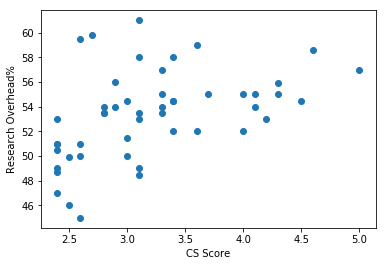

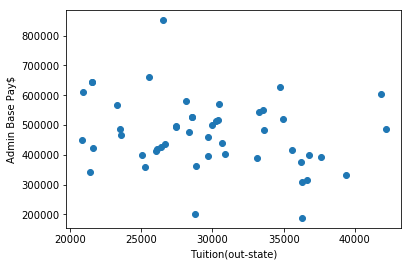

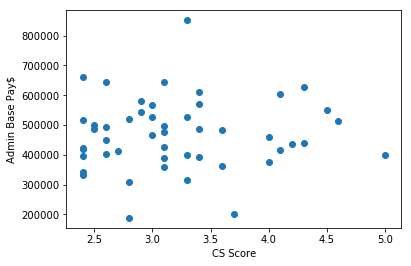

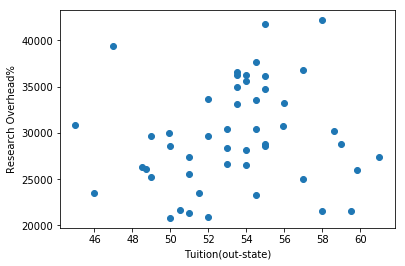

In [175]:
pyplot.scatter(cs_score_as_list,research_overhead_as_list)
pyplot.xlabel('CS Score')
pyplot.ylabel('Research Overhead%')
pyplot.show()
pyplot.scatter(tuition_as_list,admin_base_pay_as_list)
pyplot.xlabel('Tuition(out-state)')
pyplot.ylabel('Admin Base Pay$')
pyplot.show()
pyplot.scatter(cs_score_as_list,admin_base_pay_as_list)
pyplot.xlabel('CS Score')
pyplot.ylabel('Admin Base Pay$')
pyplot.show()
pyplot.scatter(research_overhead_as_list,tuition_as_list)
pyplot.ylabel('Research Overhead%')
pyplot.xlabel('Tuition(out-state)')
pyplot.show()

[ 20816.          21261.16666667  21706.33333333  22151.5         22596.66666667
  23041.83333333  23487.          23932.16666667  24377.33333333  24822.5
  25267.66666667  25712.83333333  26158.          26603.16666667
  27048.33333333  27493.5         27938.66666667  28383.83333333  28829.
  29274.16666667  29719.33333333  30164.5         30609.66666667
  31054.83333333  31500.          31945.16666667  32390.33333333  32835.5
  33280.66666667  33725.83333333  34171.          34616.16666667
  35061.33333333  35506.5         35951.66666667  36396.83333333  36842.
  37287.16666667  37732.33333333  38177.5         38622.66666667
  39067.83333333  39513.          39958.16666667  40403.33333333  40848.5
  41293.66666667  41738.83333333  42184.        ]


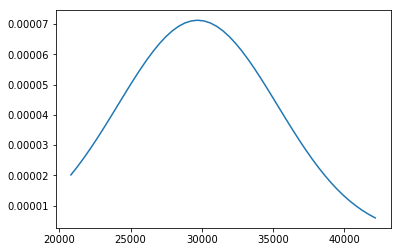

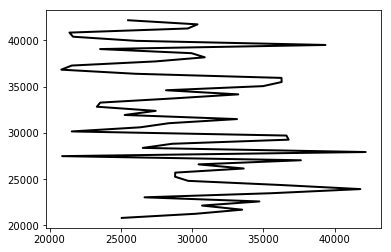

In [142]:
tuition_as_list = tuition.tolist()[:tuition.count()];
tuition_plot_data = np.linspace(min(tuition_as_list),max(tuition_as_list),len(tuition_as_list))
print(tuition_plot_data)
p = norm.pdf(tuition_plot_data,mu4,std4);
#print(p)
pyplot.plot(tuition_plot_data,p)
pyplot.show()
pyplot.plot(tuition_as_list,t, 'k', linewidth=2)
pyplot.show()

In [230]:
print(df.corr())
print(df.cov())

                     CS Score (USNews)  Research Overhead %  Admin Base Pay$  \
CS Score (USNews)                1.000                0.456            0.048   
Research Overhead %              0.456                1.000            0.165   
Admin Base Pay$                  0.048                0.165            1.000   
Tuition(out-state)$              0.279                0.140           -0.245   

                     Tuition(out-state)$  
CS Score (USNews)                  0.279  
Research Overhead %                0.140  
Admin Base Pay$                   -0.245  
Tuition(out-state)$                1.000  
                     CS Score (USNews)  Research Overhead %  \
CS Score (USNews)                0.457                1.106   
Research Overhead %              1.106               12.850   
Admin Base Pay$              3,879.782           70,279.376   
Tuition(out-state)$          1,058.480            2,805.789   

                       Admin Base Pay$  Tuition(out-state)$  
CS Sco

In [229]:
column_name_list = df.columns.values.tolist() #alternatives: list(df) | list(df.columns)
print(column_name_list)

['name', 'CS Score (USNews)', 'Research Overhead %', 'Admin Base Pay$', 'Tuition(out-state)$']


In [47]:
t = df.columns.to_series()
print(t)
print(type(t))
t2 = df.dtypes
print(t2)
print(type(t2))
grouped_dtypes = df.columns.to_series().groupby(df.dtypes).groups
print(grouped_dtypes)
print(type(grouped_dtypes))
'''
for col_name in column_name_list:
    print(col_name)
    print(df[col_name].mean())
'''

rank                                  rank
name                                  name
CS Score (USNews)        CS Score (USNews)
Research Overhead %    Research Overhead %
Admin Base Pay$            Admin Base Pay$
Tuition(out-state)$    Tuition(out-state)$
Grad Student No.          Grad Student No.
TT Faculty                      TT Faculty
Lecturers                        Lecturers
G-TT Ratio                      G-TT Ratio
G-TTL Ratio                    G-TTL Ratio
dtype: object
<class 'pandas.core.series.Series'>
rank                   float64
name                    object
CS Score (USNews)      float64
Research Overhead %    float64
Admin Base Pay$        float64
Tuition(out-state)$    float64
Grad Student No.        object
TT Faculty             float64
Lecturers              float64
G-TT Ratio             float64
G-TTL Ratio            float64
dtype: object
<class 'pandas.core.series.Series'>
{dtype('float64'): Index(['rank', 'CS Score (USNews)', 'Research Overhead %', 'Admin B

'\nfor col_name in column_name_list:\n    print(col_name)\n    print(df[col_name].mean())\n'

In [52]:
print(grouped_dtypes.keys())

dict_keys([dtype('float64'), dtype('O')])


In [72]:
df['Grad Student No.'] = df['Grad Student No.'].replace("n","0")
print(df['Grad Student No.'])
pd.to_numeric(df['Grad Student No.'])

0     NaN
1     NaN
2     214
3     NaN
4     176
5     368
6     NaN
7     NaN
8     NaN
9     225
10    339
11    254
12    NaN
13    250
14    501
15    NaN
16     75
17    350
18    299
19     63
20     97
21    594
22    313
23     60
24    NaN
25    217
26    247
27    NaN
28    685
29    NaN
30    575
31     83
32    100
33    140
34    191
35    204
36    115
37    635
38     70
39    NaN
40    NaN
41    260
42    109
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    144
49    NaN
Name: Grad Student No., dtype: object


ValueError: Unable to parse string "NaN" at position 0